<a href="https://colab.research.google.com/github/Joocheol/Financial-Engineering/blob/master/20211106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = 0.00
sig = 0.2
T = 30/365

M = 100
N = 30

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt) 

In [3]:
S0 = 100

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

In [4]:
# for i in range(M):
#     S[i,0] = S0
#     for j in range(N):
#         S[i,j+1] = S[i,j] * (1+np.random.normal(r*dt,sigsdt))


In [5]:
for i in range(M):
    S[i,0] = S0
    for j in range(N):
        S[i,j+1] = S[i,j] * (1+rv[i,j])

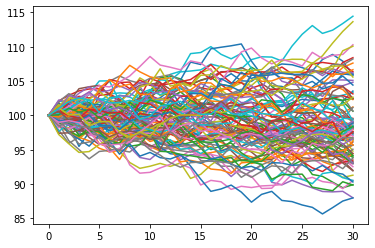

In [6]:
for i in range(M):
    plt.plot(S[i,:])

plt.show()

In [7]:
from scipy.stats import norm

In [8]:
M = 64
K = 100

hedge = 0
cost = 0
for j in range(N):
    d1 = (np.log(S[M,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
    delta = norm.cdf(d1)
    cost = cost + (hedge-delta) * S[M,j]
    hedge = delta
    #print(S[M,j], delta, cost)

if S[M,N] > K:
    delta = 1
    cost = cost + K
else:
    delta = 0
    cost = cost + S[M,N] * hedge
   
print(S[M,N], 0, cost)

106.20235671958542 0 -2.2633767414999255


In [9]:
M = 100
a = []

K = 100

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)  
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    if S[i,N] > K:
        cost = cost + (hedge-1)*S[i,N] + K
        #print(hedge)
    else:
        cost = cost + (hedge-0)*S[i,N]
        #print(hedge)
        

    a.append(cost)

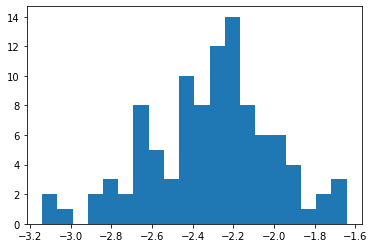

In [10]:
plt.hist(a, bins=20)
plt.show()

In [11]:
d1 = (np.log(S0/K)+(r+0.5*sig**2)*(T))/(sig*np.sqrt(T))
d2 = (np.log(S0/K)+(r-0.5*sig**2)*(T))/(sig*np.sqrt(T))

S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

2.2871506280449694

In [12]:
a = []

K = 103

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        

    a.append(cost)

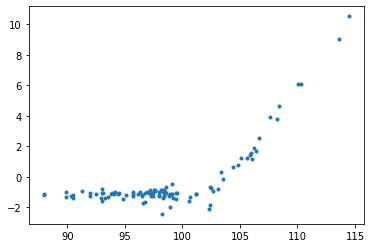

In [13]:
plt.plot(S[:,-1], a, marker=".", linestyle='none')

In [14]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        

    a.append(cost)

In [15]:
len(a)

100

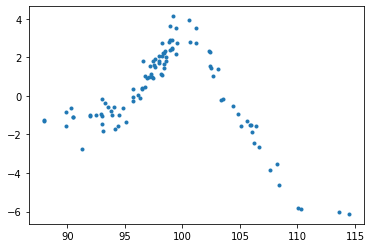

In [16]:
plt.plot(S[:,-1], a, marker=".", linestyle='none')

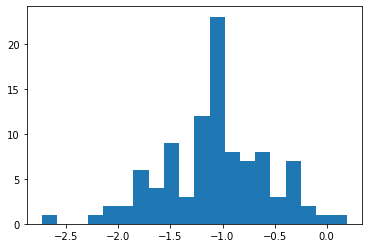

In [17]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    

    cost = cost + hedge * S[i,N] + (- np.maximum(S[i,N]-K_1,0) + 2* np.maximum(S[i,N]-K_2,0) - np.maximum(S[i,N]-K_3,0))

        

    a.append(cost)

plt.hist(a, bins=20)
plt.show()